In [1]:
# importing the requisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# removing the columns having more than 80% missing values

null_columns = housing_df.columns[100*(housing_df.isnull().sum()/len(housing_df.index)) > 80]
print(null_columns)

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [6]:
housing_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [7]:
# Separating the Numerical and Categorical features for analysis

numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

In [8]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# Analyzing Numerical Data

## Correlation in Numeric Data

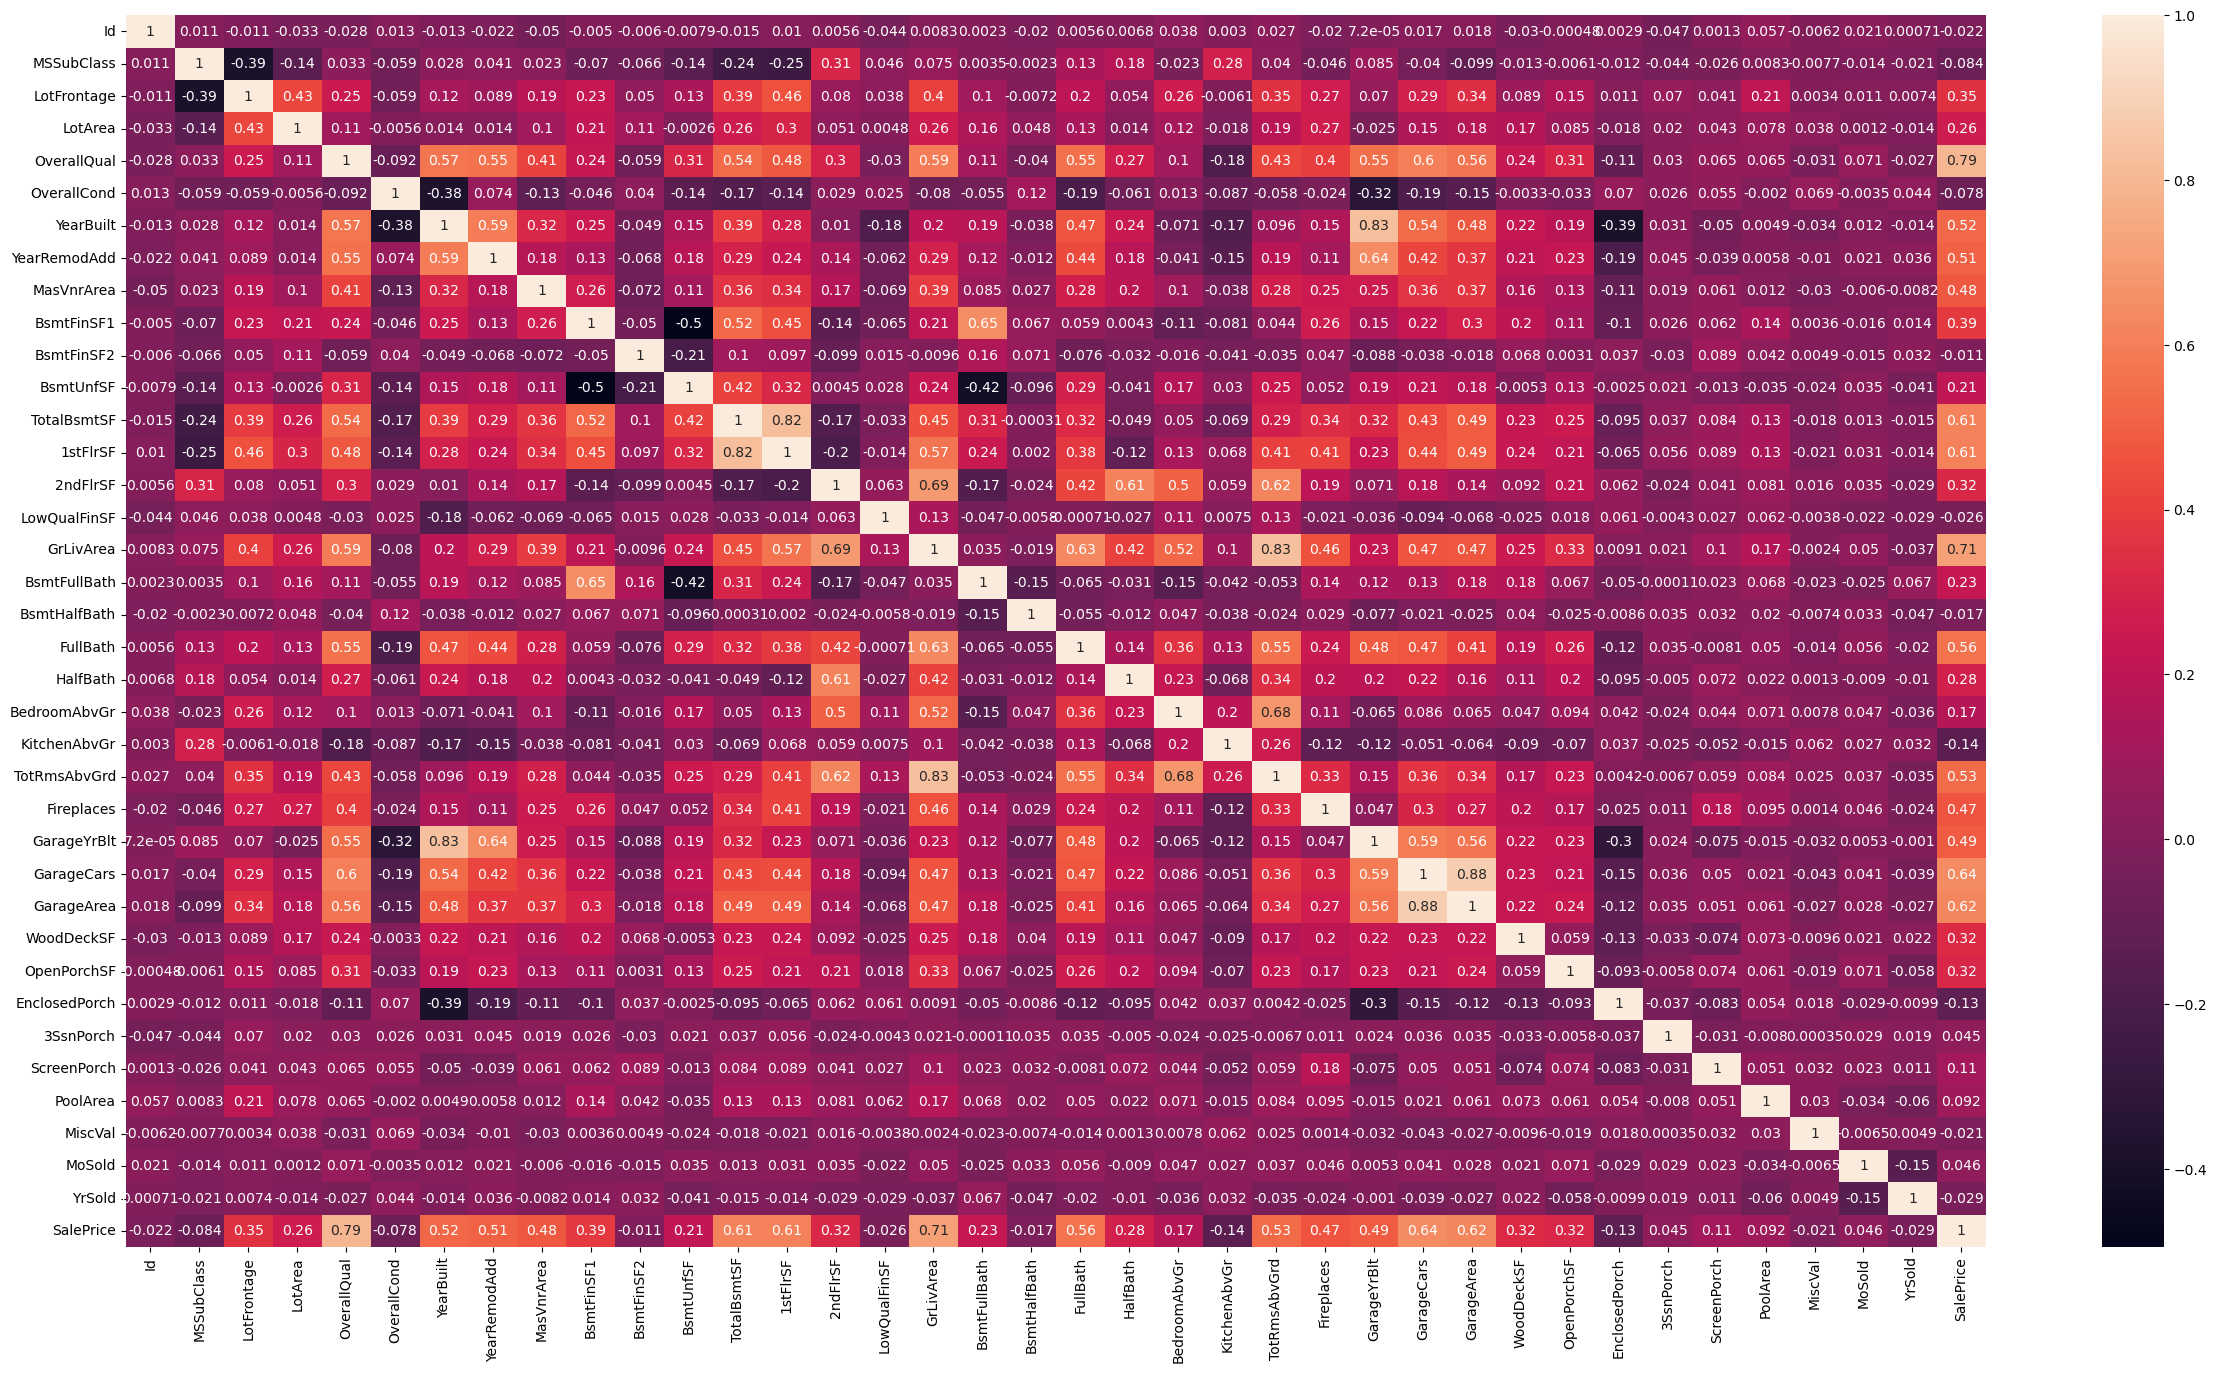

In [11]:
plt.figure(figsize=(30,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

Comment

Some of the features have high correlation with each other
GarageCars and GarageArea (0.88)
GarageYrBlt and YearBuilt (0.83)
TotRmsAbvGrd and GrLivArea (0.83)
TotalBsmtSF and 1stflrSF (0.82)
One feature from each of these pair will be dropped after data visualization.

# Univariate and Bivariate Analysis - Numerical Features

Analyzing Numerical Features with continuous values

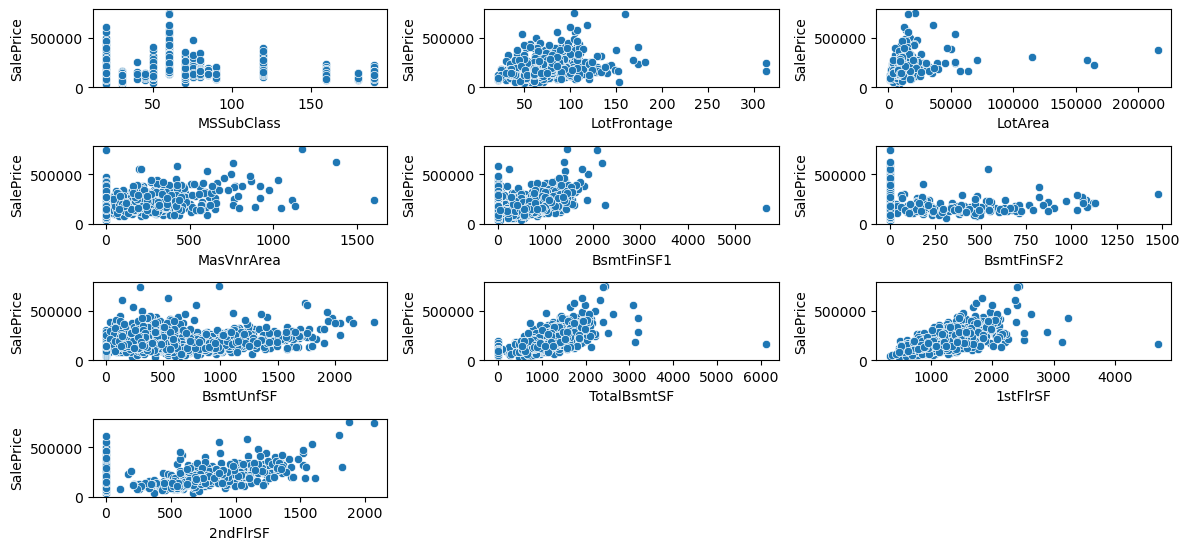

In [13]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

## Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
## 'MSSubClass' has discrete values
## 'BsmtSF2' has single value for most of the records and can be dropped.

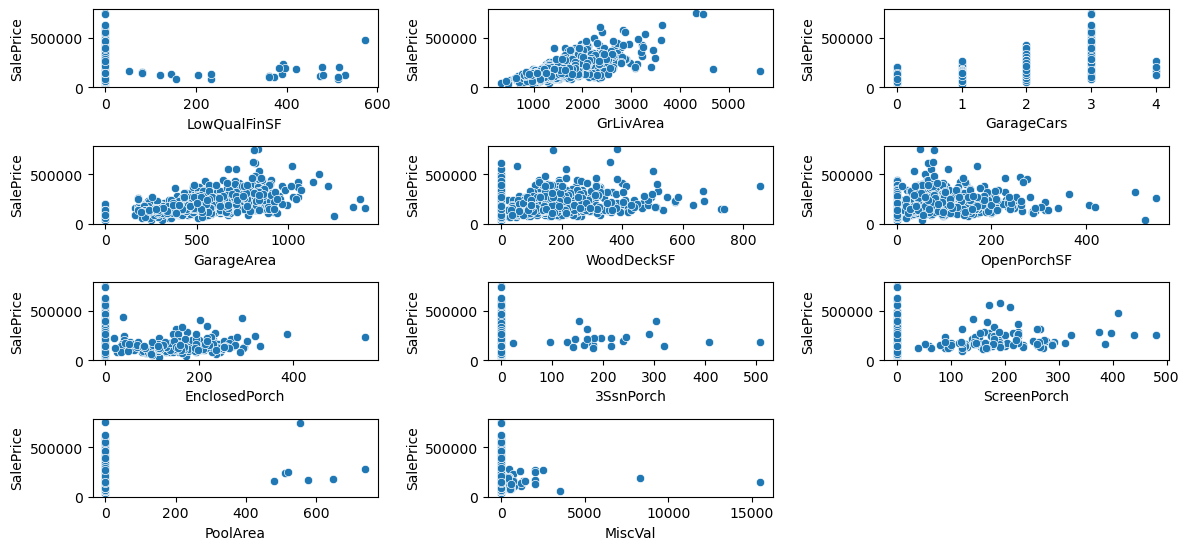

In [14]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

Comment

 'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice. 
 'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values for most the records and can be dropped.


 Visualizing the distribution of the numeric features

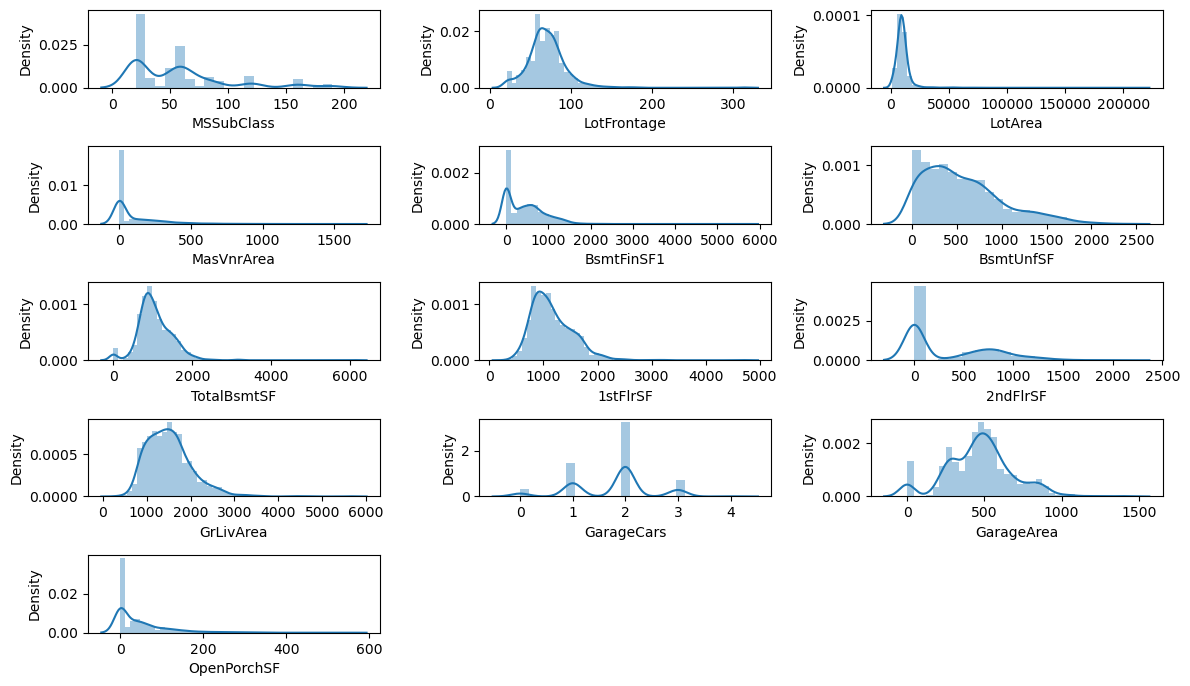

In [15]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [17]:
housing_df[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.844521,1515.463699,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,48.623081,525.480383,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1129.500000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1464.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1776.750000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,572.000000,5642.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [18]:
housing_df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPor

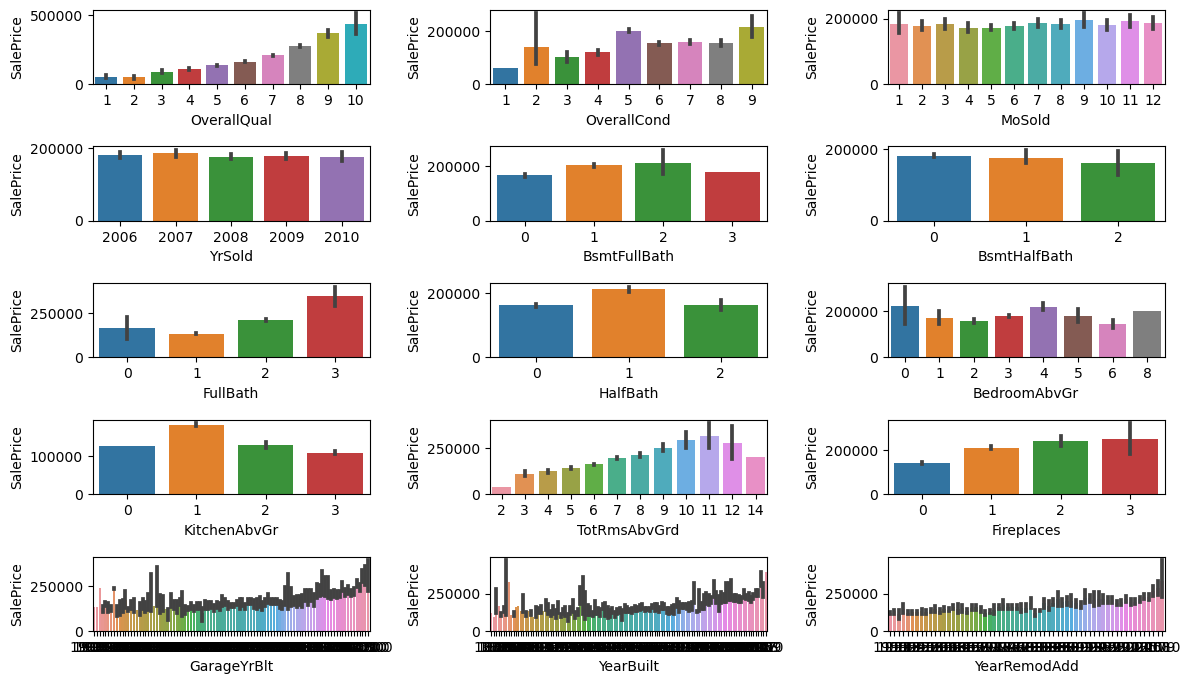

In [19]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

### Comment: Following are the observations from the plots.

'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

'OverallCond' : SalePrice is highest for rating 5

'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

'FullBath' = 3 and 'HalfBath' = 1 have highest SalePrice

'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend

'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

In [20]:
print(housing_df['BsmtFullBath'].value_counts())
print(housing_df['KitchenAbvGr'].value_counts())

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


In [21]:
# dropping KitchenAbvGr for not having useful information
housing_df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [22]:
housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.267808,1984.865753,2007.815753
std,24.689725,30.202904,20.645407,1.328095
min,1900.000000,1872.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [23]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2023 - housing_df[feature]

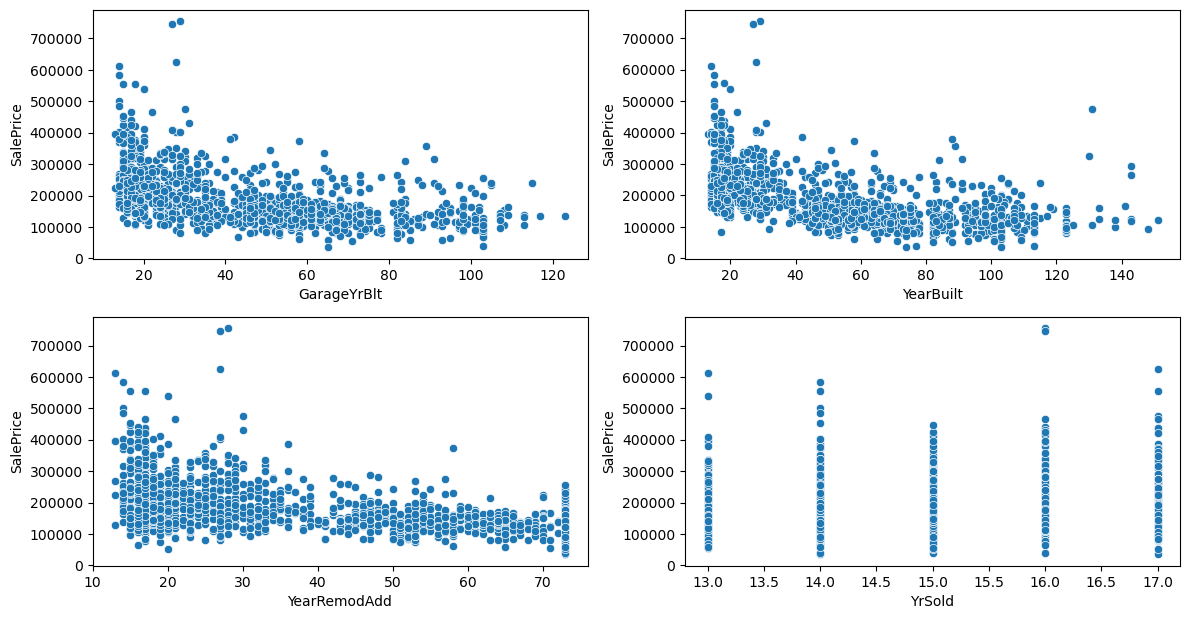

In [24]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

### Comment:

For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages
SalePrice is more lower value of YearBuilt i.e. more recently build houses

Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice

YrSold still does not show any significant trend

In [25]:
# Dropping Id column as it does not contribute towards predicting SalePrice
housing_df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [26]:
# Checking the number of remaining columns
housing_df.columns.shape

(69,)

### Comment:

GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars

GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value

TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea

TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF

Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [29]:
housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(housing_df.columns.shape)

(65,)


## Analyzing Categorical Features

In [30]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
print(categorical_df.columns.shape)

(39,)


In [32]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.select_dtypes(include=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
MasVnrType : 1.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0


### Comment:

For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'

For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'

For 'FireplaceQu' Nan means 'No Fire place' 

All these features will be imputed with meaningful values in place of missing data.

In [33]:
mv_categorical_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu']
print(housing_df[mv_categorical_features].isnull().sum())

BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
FireplaceQu     690
dtype: int64


In [34]:
# Imputing missing values with "Not_applicable"
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing_df[mv_categorical_features].isnull().sum())

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
dtype: int64


In [35]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_df.columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0
MasVnrType : 1.0
MasVnrArea : 1.0
Electrical : 0.0


In [36]:
housing_df.columns.shape

(65,)

## Outlier Detection

Checking percentage of outliers for all the numerical columns.

In [37]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
29,EnclosedPorch,14.25
9,BsmtFinSF2,11.44
4,OverallCond,8.56
31,ScreenPorch,7.95
0,MSSubClass,7.05
7,MasVnrArea,6.58
1,LotFrontage,6.03
17,BsmtHalfBath,5.62
28,OpenPorchSF,5.27
2,LotArea,4.73


### Comment:

Majority of the numeric features have outliers
Dropping all the outliers will cause loss of information.

In [38]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(x=housing_df['SalePrice'], y=housing_df[feature])
        plt.tight_layout()

Dividing the ordinal features into smaller segments and visualizing their impact on SalePrice.

## Analyzing Ordered Features

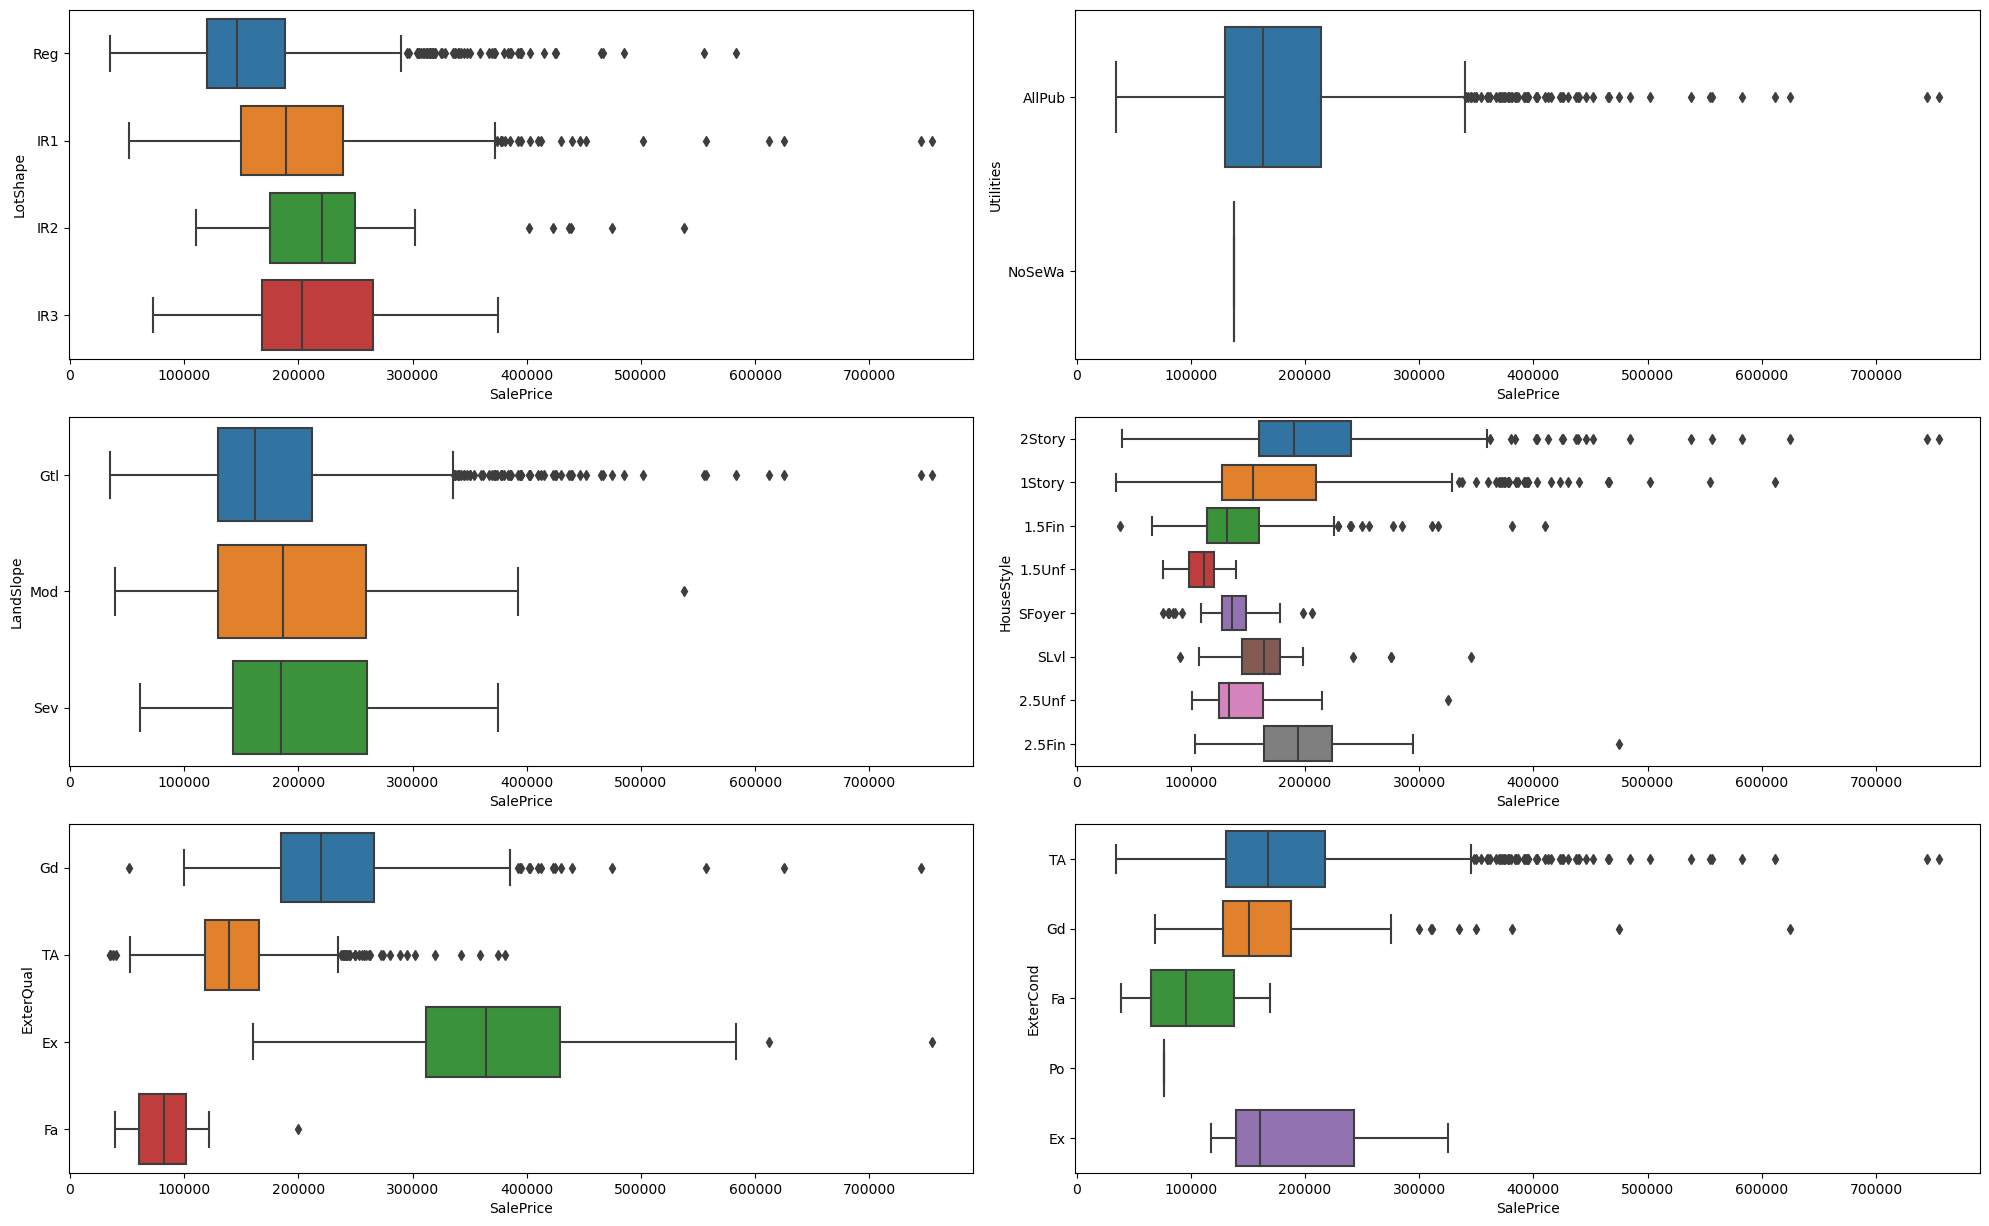

In [39]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

generate_boxplot(ext_features)

### Comment:

'LotShape' : Slightly irregular LotShape have the highest SalePrice

'Utilities' : Most of the houses in the dataset have all the public utilities

'LandSlope' : Houses at severe land slope have lowest SalePrice

'HouseStyle' : 2 storied houses have the highest SalePrice

'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice

'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

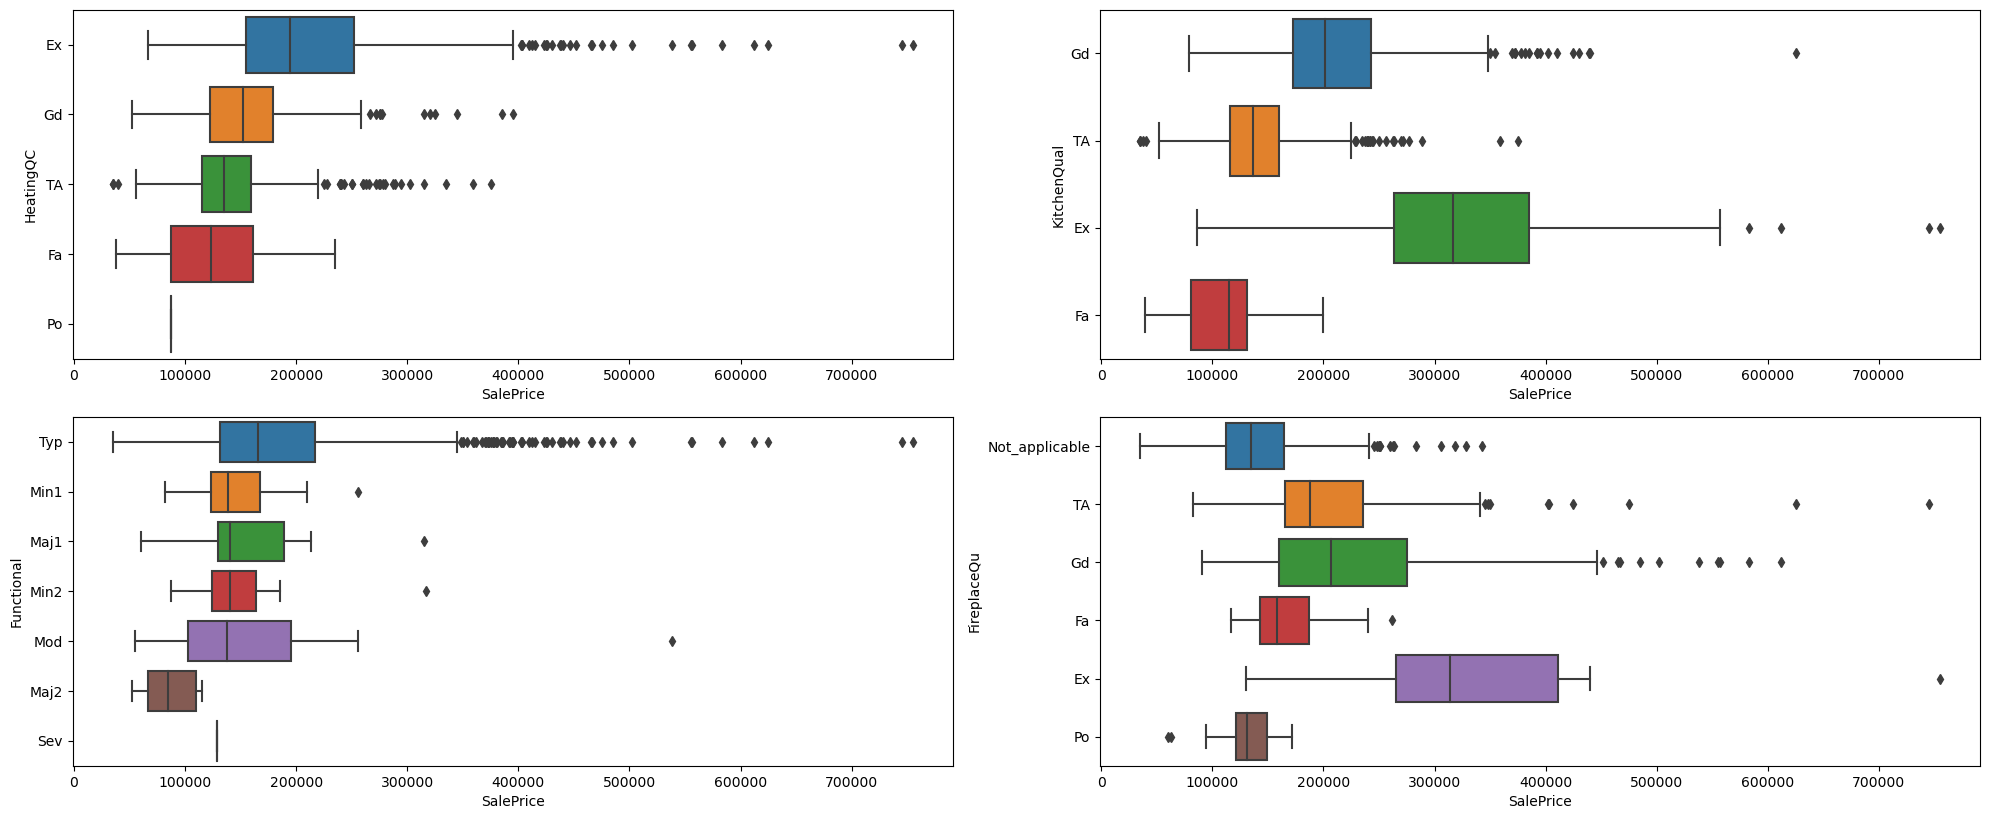

In [40]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

### Comment:

Houses having excellent heating quality and kitchen quality have the highest SalePrice.

Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.

SalePrice range in largest for houses with average fireplace quality.


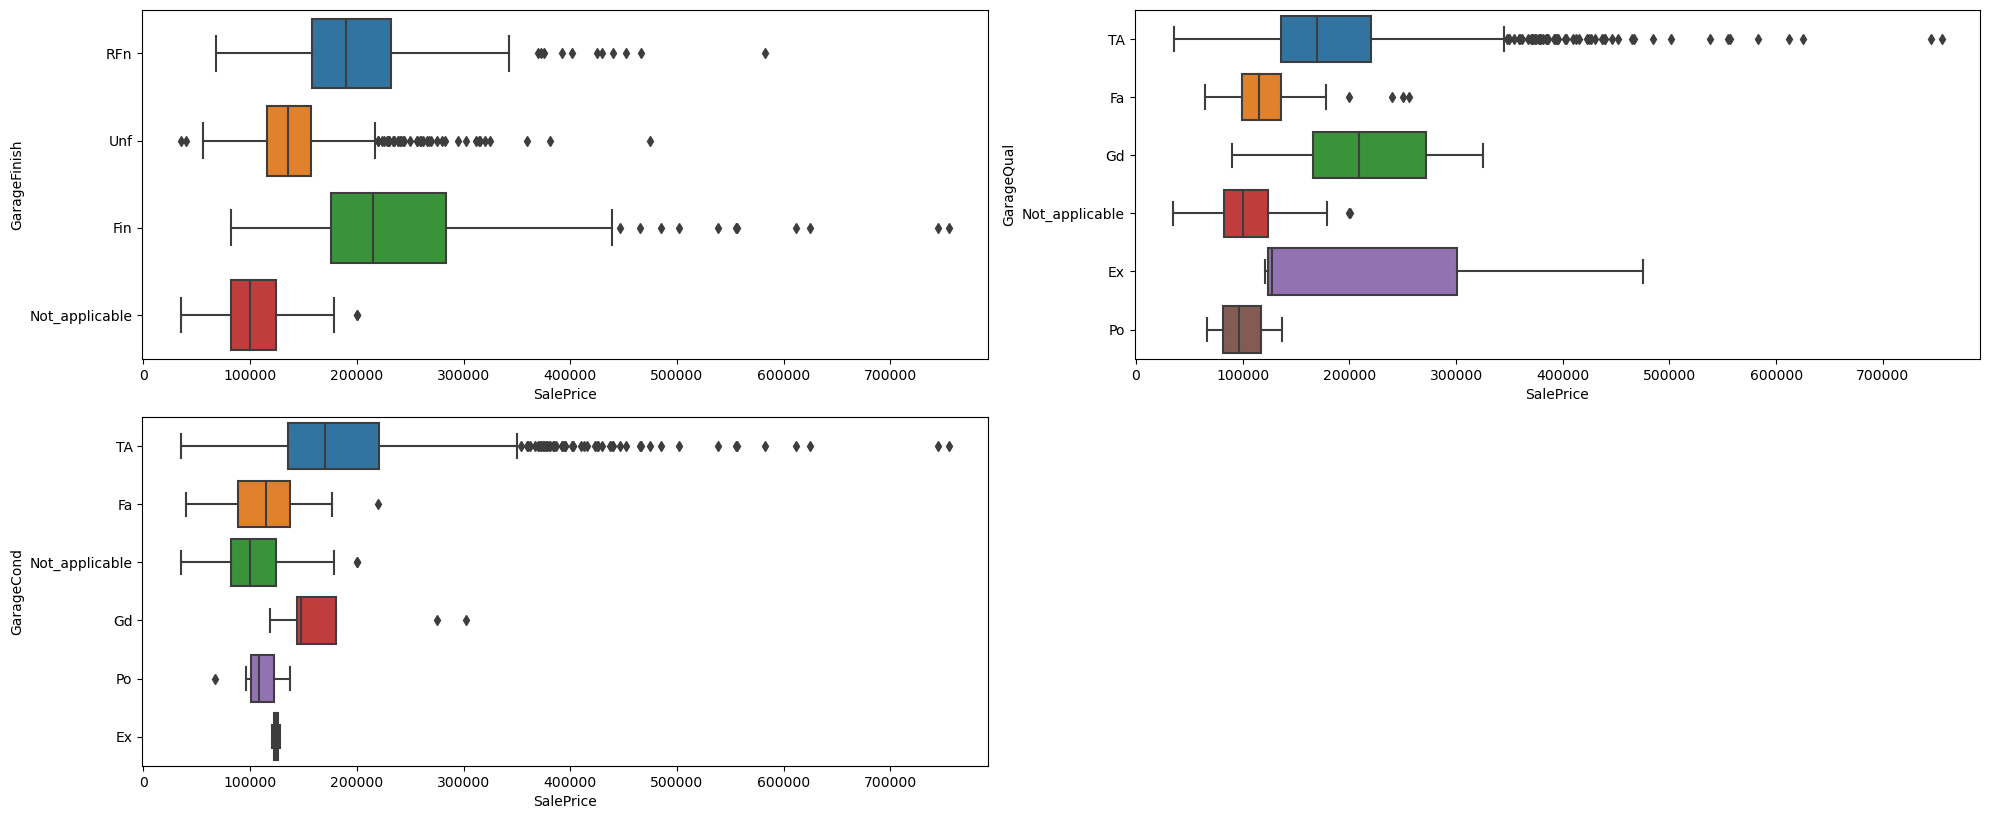

In [41]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

### Comment:

SalePrice is highest where garage is finished.

The range of SalePrice is widest for Typical/Average Garage quality and condition.

There are very few houses with excellect condition of garage.


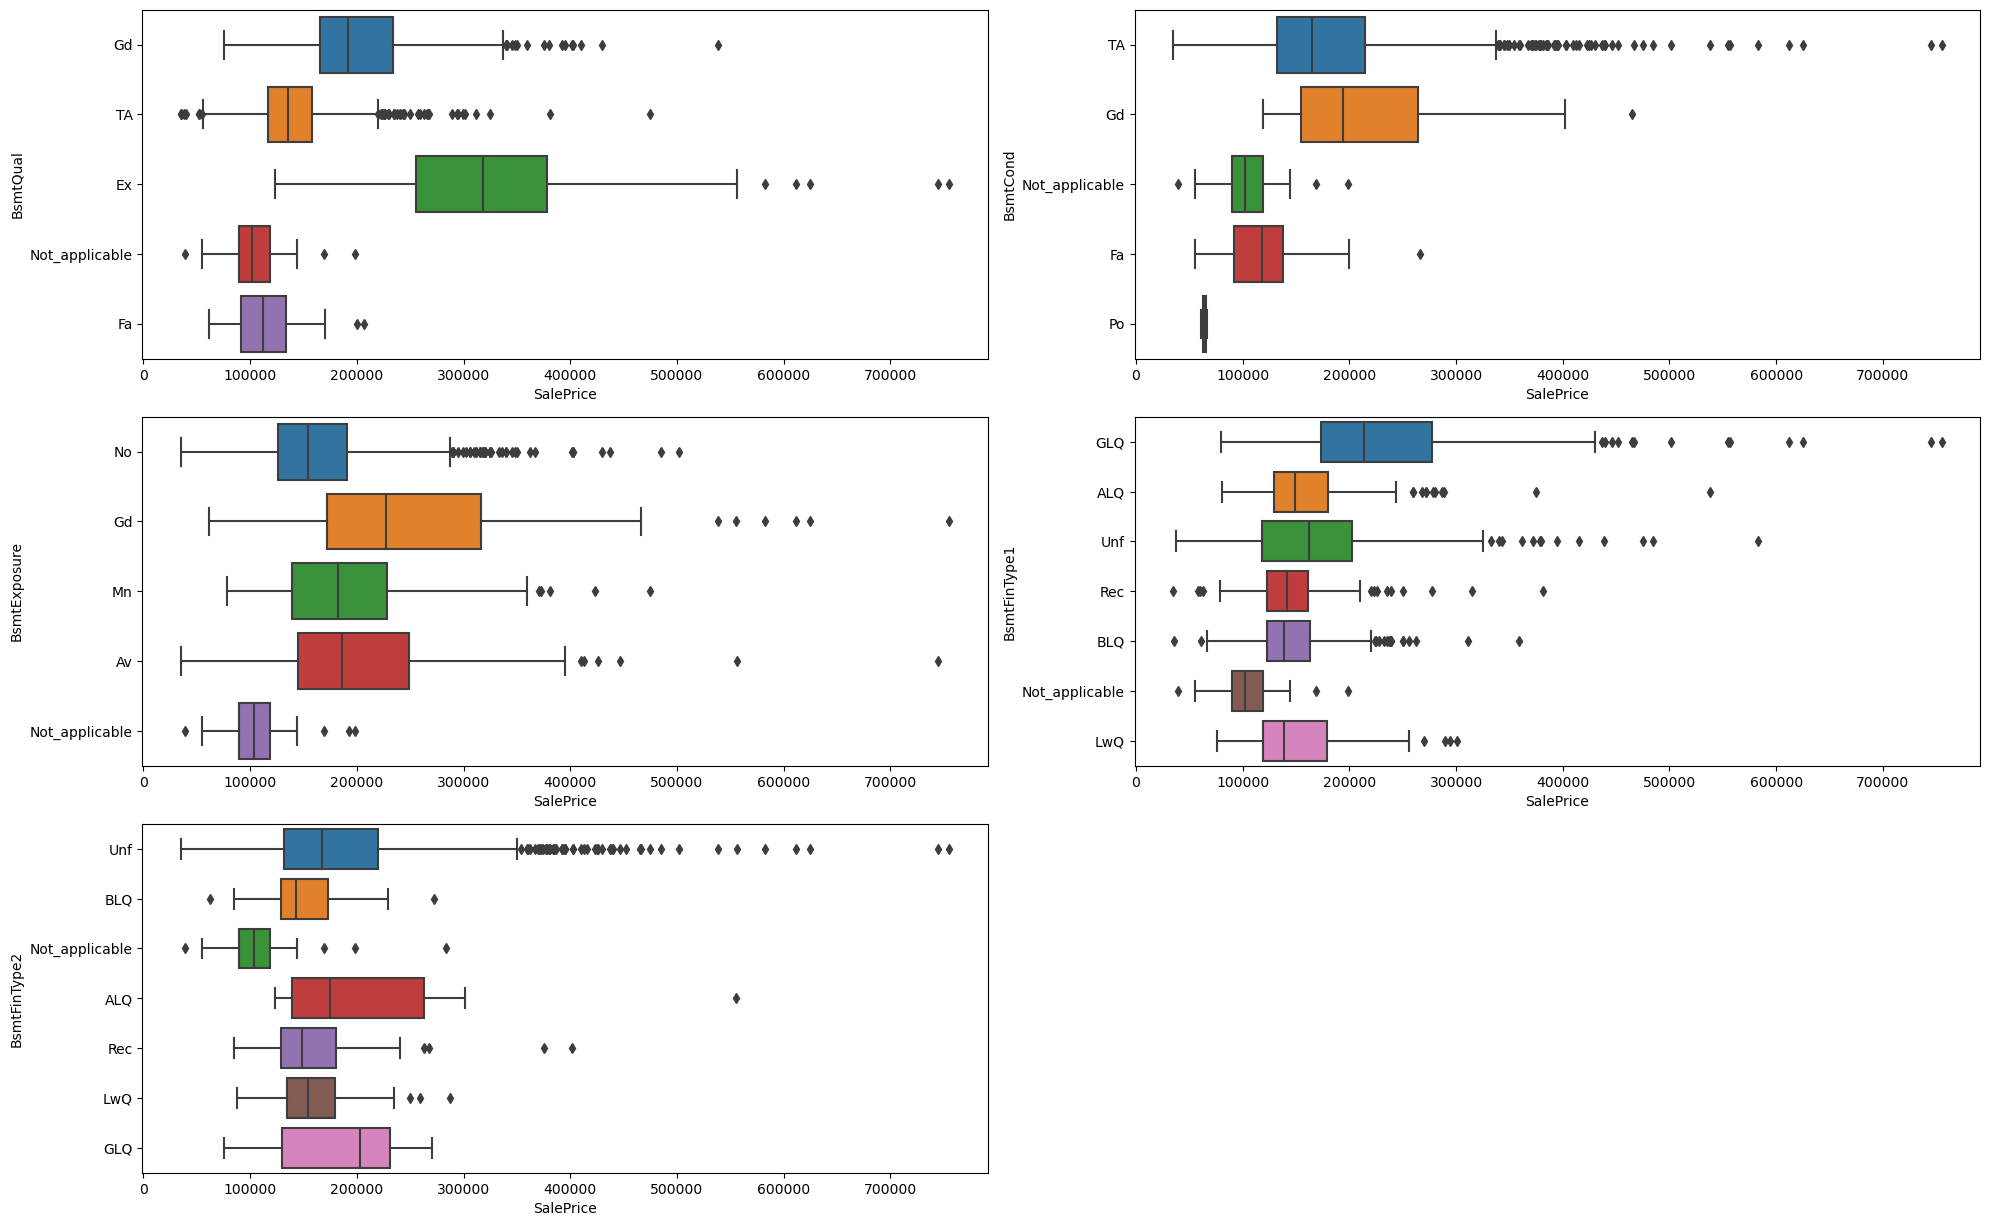

In [42]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

### Comment:

Houses with excellent quality basement have the highest SalePrice

Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice

A lot of houses have unfinished basment or no basement (label = Not_applicable)

## Encoding Categorical Features

In [43]:
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [44]:
# Checking the features after encoding

housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1460 non-null   int64
 1   Utilities     1460 non-null   int64
 2   LandSlope     1460 non-null   int64
 3   HouseStyle    1460 non-null   int64
 4   ExterQual     1460 non-null   int64
 5   ExterCond     1460 non-null   int64
 6   BsmtQual      1460 non-null   int64
 7   BsmtCond      1460 non-null   int64
 8   BsmtExposure  1460 non-null   int64
 9   BsmtFinType1  1460 non-null   int64
 10  BsmtFinType2  1460 non-null   int64
 11  HeatingQC     1460 non-null   int64
 12  KitchenQual   1460 non-null   int64
 13  Functional    1460 non-null   int64
 14  FireplaceQu   1460 non-null   int64
 15  GarageFinish  1460 non-null   int64
 16  GarageQual    1460 non-null   int64
 17  GarageCond    1460 non-null   int64
dtypes: int64(18)
memory usage: 205.4 KB


## Analyzing Unordered Featues

In [45]:
unordered_features = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition']

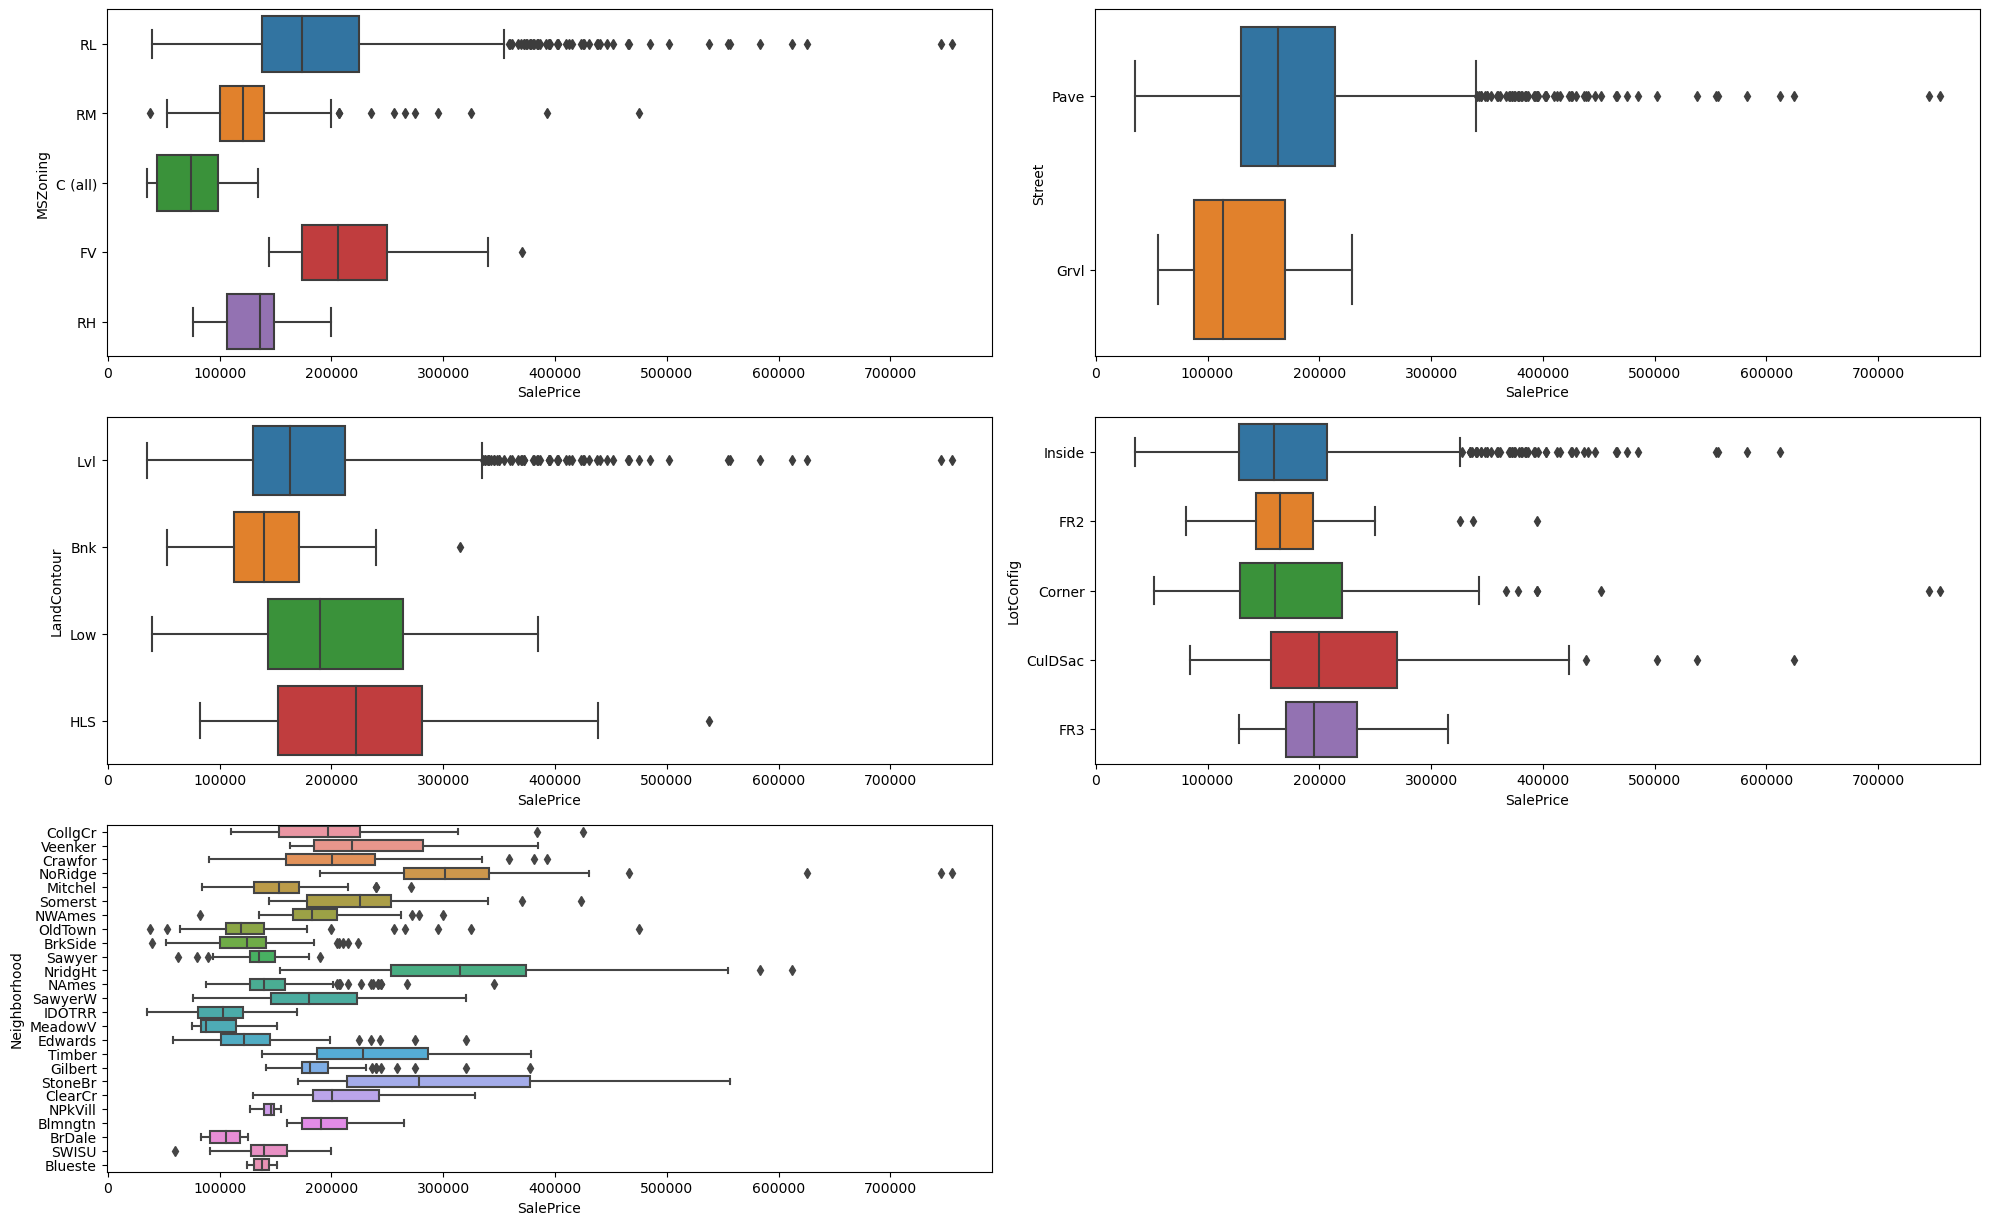

In [46]:
generate_boxplot(['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood'])

### Comment:

Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns

Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

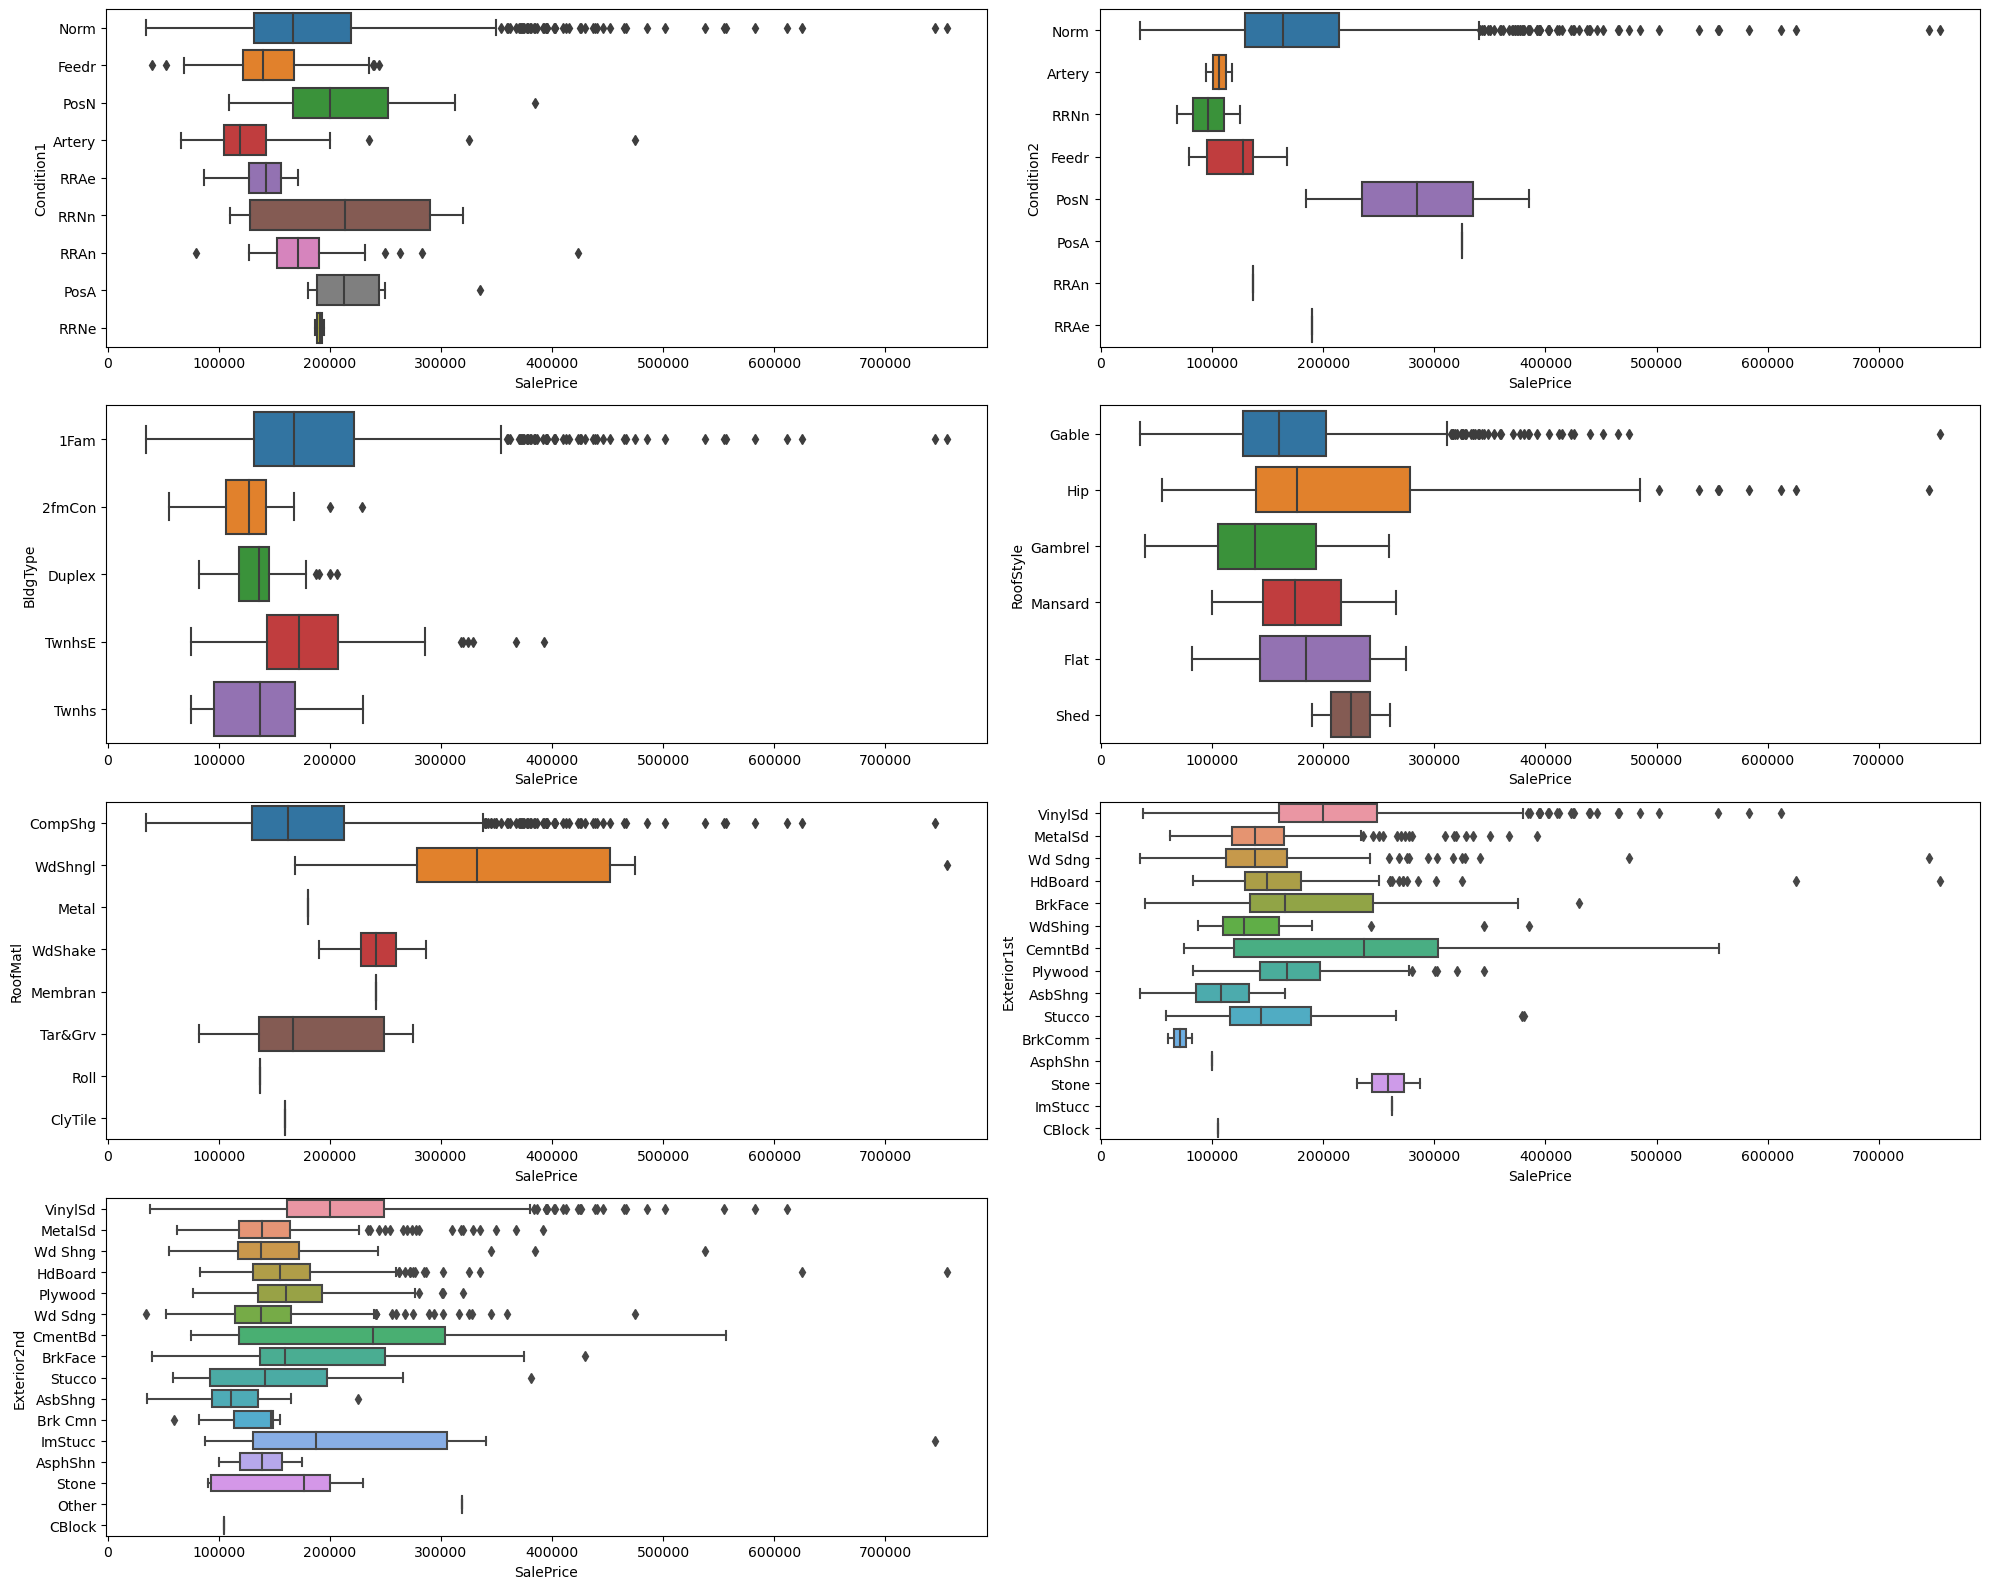

In [47]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

### Comment:

Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.

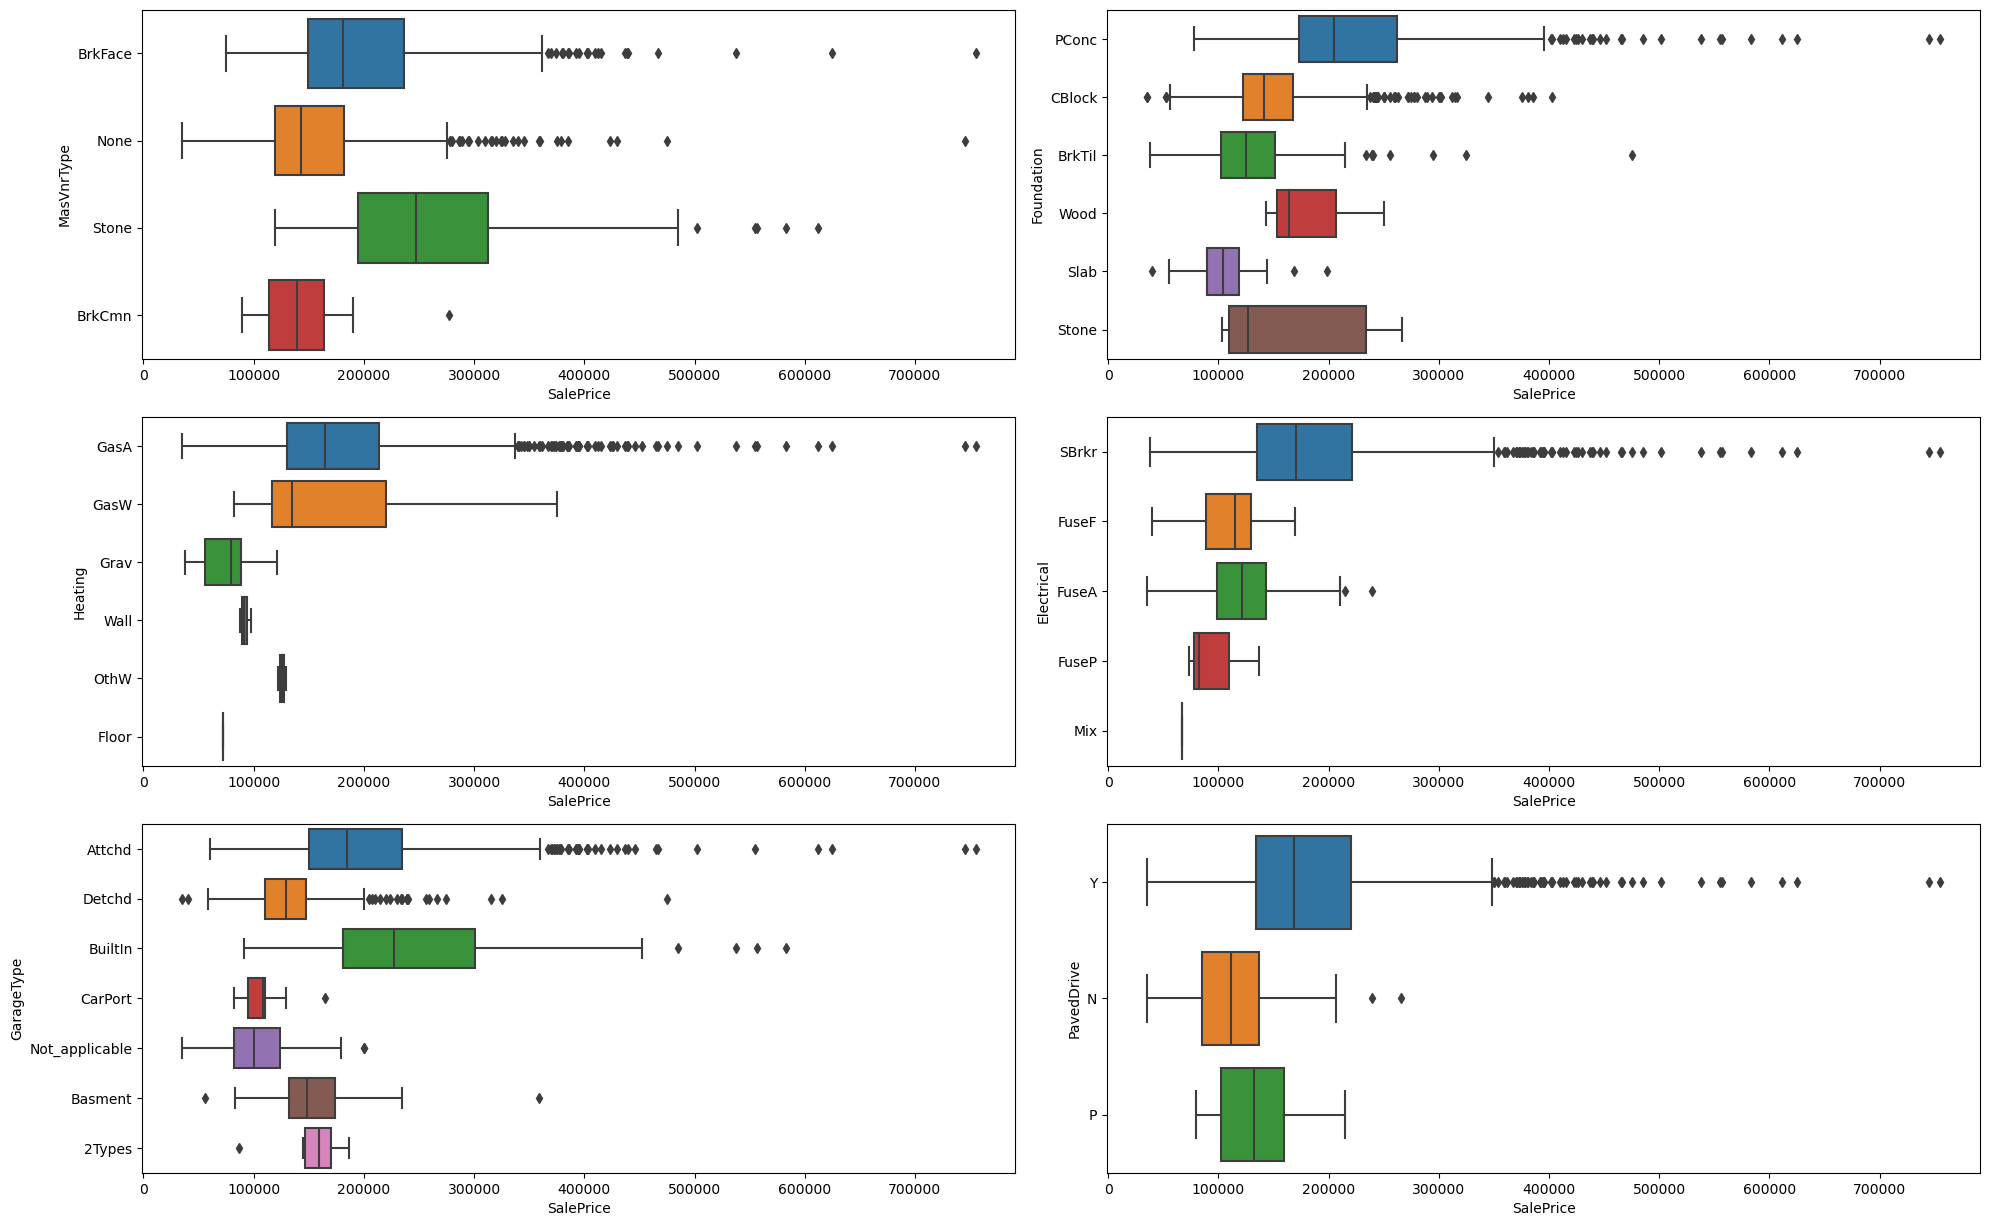

In [50]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive'])

### Comment:

Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

Houses with attached and built-in garage have high SalePrice


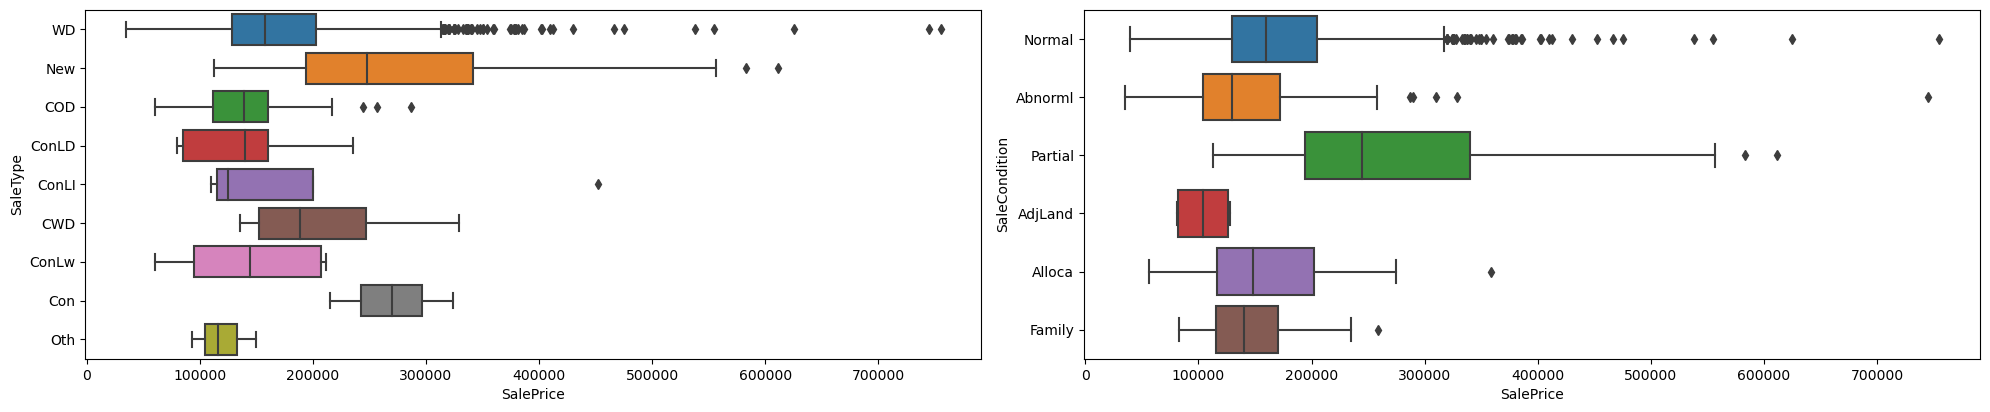

In [51]:
generate_boxplot(['SaleType','SaleCondition'])

### Comment:

Most of the houses are newly built, houses with warranty deed have high SalePrice

Sale condition = Normal leads to high SalePrice

## Encoding Categorical Variables

In [53]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)
dummy_df.shape

(1460, 134)

### Comment:

Adding 144 features to the existing dataset will make the model very complex.

From the above boxplots, for some categorical features only label is dominating over others.

In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [54]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_

In [55]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1460, 47)


In [56]:
housing_df.shape

(1460, 65)

In [57]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [58]:
housing_df.shape

(1460, 92)

## Splitting into Train and Test Data

In [59]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,3,0,3,7,5,20,...,1,1,0,0,0,1,0,1,1,0
1,20,80.0,9600,3,3,0,0,6,8,47,...,1,1,0,0,0,1,0,1,1,0
2,60,68.0,11250,0,3,0,3,7,5,22,...,1,1,0,0,0,1,0,1,1,0
3,70,60.0,9550,0,3,0,3,7,5,108,...,1,0,0,1,0,1,0,1,0,0
4,60,84.0,14260,0,3,0,3,8,5,23,...,1,1,0,0,0,1,0,1,1,0


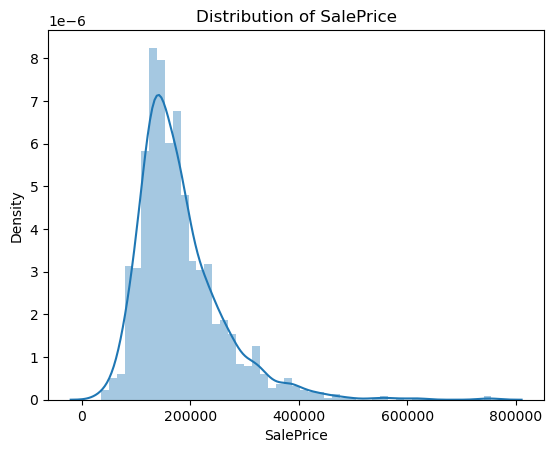

In [60]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

### Comment: 
Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.

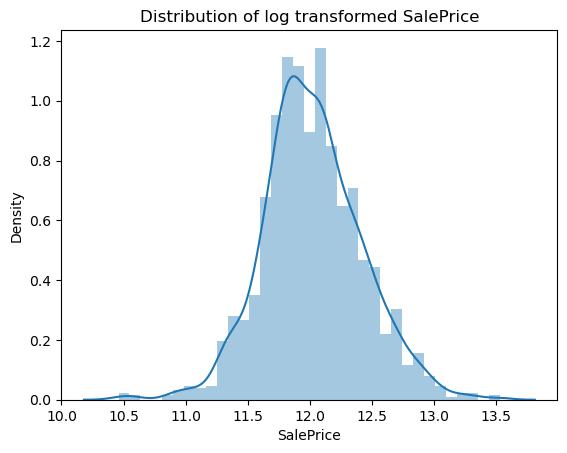

In [61]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [62]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 91)
(438, 91)
(1022,)
(438,)


In [65]:
X_train.isnull().any()

MSSubClass               False
LotFrontage               True
LotArea                  False
LotShape                 False
Utilities                False
                         ...  
PavedDrive_Y             False
SaleType_New             False
SaleType_WD              False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 91, dtype: bool

In [66]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [67]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [68]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

## Feature Scaling

In [69]:
X_train.values

array([[3.000e+01, 6.700e+01, 5.604e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 9.000e+01, 9.900e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+01, 5.200e+01, 8.741e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.200e+02, 6.800e+01, 7.820e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.000e+01, 6.000e+01, 1.044e+04, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 9.200e+01, 9.920e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [70]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [71]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [72]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.657427    -0.121681 -0.473943  0.748189   0.031296  -0.228353   
1       0.035958     0.920573 -0.056819  0.748189   0.031296   3.307661   
2      -0.195170    -0.801412 -0.169353  0.748189   0.031296  -0.228353   
3      -0.195170    -0.484204 -0.502489  0.748189   0.031296  -0.228353   
4       3.040630    -0.438889  0.082999  0.748189   0.031296  -0.228353   
...          ...          ...       ...       ...        ...        ...   
1017    0.035958    -0.302943 -0.221979  0.748189   0.031296  -0.228353   
1018   -0.888556    -0.076366  3.863036 -1.389693   0.031296  -0.228353   
1019    1.422730    -0.076366 -0.258778 -1.389693   0.031296  -0.228353   
1020   -0.195170    -0.438889 -0.004387  0.748189   0.031296  -0.228353   
1021    0.035958     1.011204 -0.054877 -1.389693   0.031296  -0.228353   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  Electrical_SBrkr  \
0      -0.853838   

## Initial Feature Selection with RFE

In [73]:
X_tr_scaled = X_tr_scaled.drop(['MasVnrArea'], axis=1)
X_te_scaled = X_te_scaled.drop(['MasVnrArea'], axis=1)

In [74]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n_features_to_select=n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [75]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'SaleType_New', 'SaleCondition_Normal']
Top 50 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'B

In [76]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary()) 

In [77]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        20:54:42   Log-Likelihood:                 634.55
No. Observations:                1022   AIC:                            -1177.
Df Residuals:                     976   BIC:                            -950.3
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [78]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        20:54:53   Log-Likelihood:                 642.49
No. Observations:                1022   AIC:                            -1185.
Df Residuals:                     972   BIC:                            -938.5
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [79]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     153.4
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        20:55:03   Log-Likelihood:                 649.02
No. Observations:                1022   AIC:                            -1188.
Df Residuals:                     967   BIC:                            -916.9
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Comment:
By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [80]:
X_train_rfe = X_tr_scaled[top_55]
X_test_rfe = X_te_scaled[top_55]

In [81]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

## Ridge Regression

In [82]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 50.000000
ridge  Regression with  50
R2 score (train) :  0.8937775836089076
R2 score (test) :  0.8792309479125858
RMSE (train) :  0.12924836032226544
RMSE (test) :  0.14096578983370558


## Lasso Regression

In [83]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 5,10, 20,100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.8938853664742893
R2 score (test) :  0.8803988942291335
RMSE (train) :  0.12918277014487825
RMSE (test) :  0.14028250026434955


In [84]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients


,Ridge (alpha=20),Lasso (alpha=0.001)
MSSubClass,-0.025065,-0.025762
LotFrontage,-0.007638,-0.009557
LotArea,0.014853,0.013258
LandSlope,0.011938,0.012263
OverallQual,0.081807,0.087349
OverallCond,0.035181,0.037553
YearBuilt,-0.023468,-0.028126
YearRemodAdd,-0.015164,-0.013737
BsmtQual,0.016869,0.013962
BsmtExposure,0.024217,0.023559


In [85]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[116245 188458 169729 205452 160055]


## Final Model

Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [86]:
# 55 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
1stFlrSF,0.094437
OverallQual,0.087349
2ndFlrSF,0.081961
OverallCond,0.037553
MSZoning_RL,0.034260
FireplaceQu,0.033778
BsmtFullBath,0.029324
GarageArea,0.028011
Condition1_Norm,0.026000
Neighborhood_Somerst,0.025886


In [87]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'OverallCond', 'MSZoning_RL',
       'FireplaceQu', 'BsmtFullBath', 'GarageArea', 'Condition1_Norm',
       'Neighborhood_Somerst'],
      dtype='object')

### Summary

First the housing data is read and analyzed dividing the features into numerical and categorical types.
SalePrice is the target column here.

All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is observed for change in individual features.

New features are extracted, redundant features dropped and categorical features are encoded accordingly.

Then the data in split into train and test data and feature scaling is performed.

Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.

Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.

Top 55 features are selected through RFE and adjusted R-square. 

Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 20.0 for ridge and 0.001 for lasso model.

Model evaluation is done with R2 score and Root Mean Square Error.

Lasso Regression is chosen as final model for having slightly better R-square value on test data.

Out of 55 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'MSZoning_RL',
       'FireplaceQu', 'BsmtFullBath', 'GarageArea', 'Neighborhood_Somerst',
       'Condition1_Norm'][['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'MSZoning_RL',
       'FireplaceQu', 'BsmtFullBath', 'GarageArea', 'Neighborhood_Somerst',
       'Condition1_Norm']

Model coefficients are listed in a table along with the corresponding features , Negative sign in the coefficient signifies negative correlation between the predictor and target variable.

Predicted value of SalePrice is tranformed into its original scale by performing antilog.

# Subjective Questions Code

## Que 1 : Double the values of Alpha for lasso & Ridge

In [94]:
# Model Building with alpha 40 as earlier it was with 20
ridge_model = Ridge(alpha=40.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=40.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=40.0
R2 score (train) :  0.8942
R2 score (test) :  0.8792
RMSE (train) :  0.129
RMSE (test) :  0.141


In [95]:
#Model building with 0.002 as it was 0.001 earlier
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.8922
R2 score (test) :  0.8811
RMSE (train) :  0.1302
RMSE (test) :  0.1399


In [96]:
model_coefficients['Ridge (alpha = 40.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
MSSubClass,-0.025065,-0.025762,-0.025639,-0.023084
LotFrontage,-0.007638,-0.009557,-0.008325,-0.006628
LotArea,0.014853,0.013258,0.014766,0.012694
LandSlope,0.011938,0.012263,0.012003,0.011355
OverallQual,0.081807,0.087349,0.082594,0.089978
OverallCond,0.035181,0.037553,0.035693,0.036373
YearBuilt,-0.023468,-0.028126,-0.024328,-0.026627
YearRemodAdd,-0.015164,-0.013737,-0.014668,-0.014879
BsmtQual,0.016869,0.013962,0.016371,0.014380
BsmtExposure,0.024217,0.023559,0.024448,0.021686


### Comment:

1) looks like after double the vale of alpha, R2 score for traing dropped slightly and R2 score went up very slightly.

2) model_coefficients also decreased while double the value of alpha.

In [97]:
model_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(1)

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
OverallQual,0.081807,0.087349,0.082594,0.089978


In [98]:
model_coefficients.sort_values(by='Ridge (alpha = 40.0)', ascending=False).head(1)

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
OverallQual,0.081807,0.087349,0.082594,0.089978


## Que3: Drop the Top 5 features and rebuild lasso

In [99]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
1stFlrSF,0.078492,0.094437,0.081549,0.089274
OverallQual,0.081807,0.087349,0.082594,0.089978
2ndFlrSF,0.065148,0.081961,0.068572,0.075573
OverallCond,0.035181,0.037553,0.035693,0.036373
MSZoning_RL,0.031867,0.034260,0.032404,0.033438


In [100]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'MSZoning_RL'], axis=1)

In [101]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'MSZoning_RL'], axis=1)

In [102]:
#Rebuilding the model
alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [103]:
lasso_model.coef_

array([-0.03383753,  0.        ,  0.01941828,  0.0054364 , -0.00499509,
       -0.03474505,  0.03376057,  0.03274677,  0.02398551,  0.00896308,
        0.01759909,  0.02299803,  0.02025905,  0.05736247,  0.03423991,
        0.01472848,  0.04626537,  0.07375583, -0.01858377,  0.06051245,
        0.01957767,  0.04902535,  0.0287421 ,  0.00789382,  0.01819501,
       -0.01449065, -0.02310685, -0.02086751,  0.01536554,  0.00996076,
        0.02447395, -0.01823709,  0.        , -0.00491275, -0.00824572,
        0.        , -0.00608904,  0.00890847,  0.00904025,  0.00457697,
        0.00462969,  0.0080139 ,  0.01980876, -0.01116743,  0.02363207,
        0.        ,  0.0247332 ,  0.00972622,  0.01841816,  0.00355856])

In [104]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
TotRmsAbvGrd,0.073756
FireplaceQu,0.060512
FullBath,0.057362
GarageArea,0.049025
KitchenQual,0.046265
